In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import datetime

In [3]:
os.chdir("/content/drive/MyDrive")

In [4]:
city_data = pd.read_csv("City.csv")
cab_data=pd.read_csv("Cab_Data.csv")
customer_data=pd.read_csv("Customer_ID.csv")
transaction_data=pd.read_csv("Transaction_ID.csv")

In [5]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [9]:
def ordinary_date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp+delta
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:ordinary_date(x))
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [10]:
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [11]:
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA


In [12]:
cab_data['State'].value_counts()

State
NY        99885
CA        70888
IL        56625
DC        43737
MA        29692
TX        11913
VALLEY     8519
WA         7997
GA         7557
FL         6454
AZ         3995
COUNTY     3982
CO         3825
TN         3010
PA         1313
Name: count, dtype: int64

In [13]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

State
NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: count, dtype: int64

In [14]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392 non-null  float64       
 8   State           359392 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 24.7+ MB


In [15]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [16]:
city_data['Population'] = city_data['Population'].apply(lambda x:x.replace(",",""))
city_data['Users'] = city_data['Users'].apply(lambda x:x.replace(",",""))

city_data['Population']=city_data['Population'].astype("int64")
city_data['Users']=city_data['Users'].astype("int64")

In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [19]:
# Merge datasets to create a master dataset
master_data = cab_data.merge(transaction_data, on='Transaction ID')
master_data = master_data.merge(customer_data, on='Customer ID')
master_data = master_data.merge(city_data, on='City')

print(master_data.head())


   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip    Profit State  Customer ID Payment_Mode  \
0         370.95      313.6350   57.3150    GA        29290         Card   
1         598.70      317.4228  281.2772    GA        29290         Cash   
2         792.05      597.4020  194.6480    GA        29290         Card   
3         358.52      334.8540   23.6660    GA        27703         Card   
4         721.10      467.1192  253.9808    GA        27703         Card   

  Gender  Age  Income (USD/Month)  Population  Users  
0   Male   28               10813      8148

       Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-19 01:37:55.042293504      22.567254   
min      1.000001e+07            2016-01-04 00:00:00       1.900000   
25%      1.011081e+07            2016-11-25 00:00:00      12.000000   
50%      1.022104e+07            2017-09-12 00:00:00      22.440000   
75%      1.033094e+07            2018-05-14 00:00:00      32.960000   
max      1.044011e+07            2019-01-02 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip         Profit    Customer ID  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113     137.253198   19191.652115   
min        15.600000      19.000000    -220.060000       1.000000   
25%       206.437500     151.200000      28.012000    2705.000000   
50%       386.3

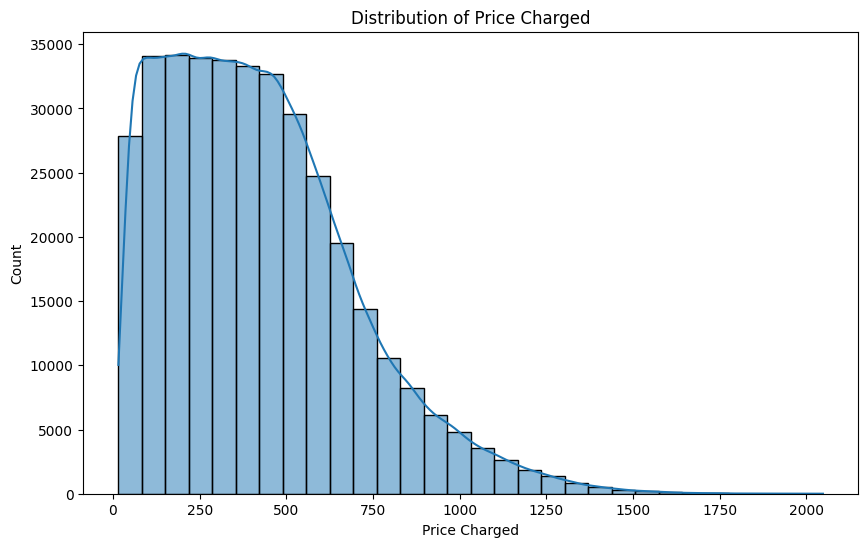

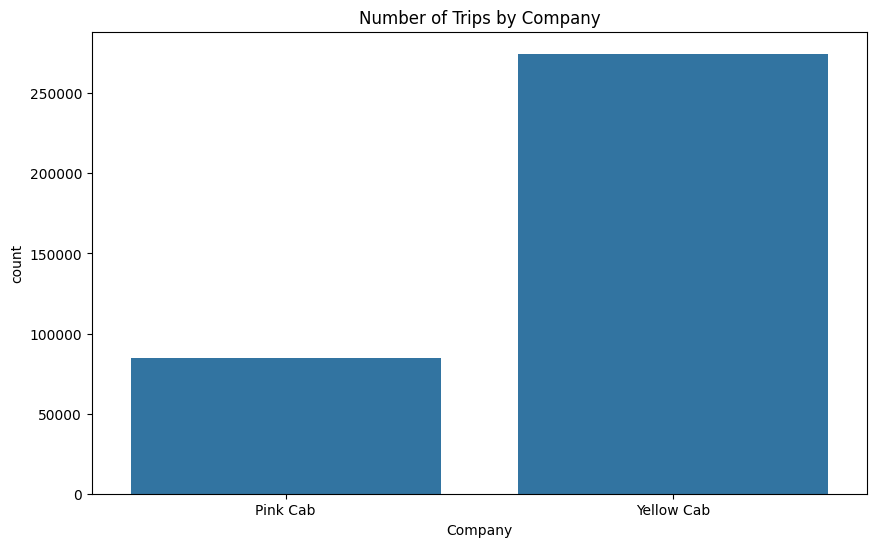

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(master_data.describe())

# Visualizations
# Distribution of Price Charged
plt.figure(figsize=(10, 6))
sns.histplot(master_data['Price Charged'], bins=30, kde=True)
plt.title('Distribution of Price Charged')
plt.show()

# Number of trips by Company
plt.figure(figsize=(10, 6))
sns.countplot(data=master_data, x='Company')
plt.title('Number of Trips by Company')
plt.show()


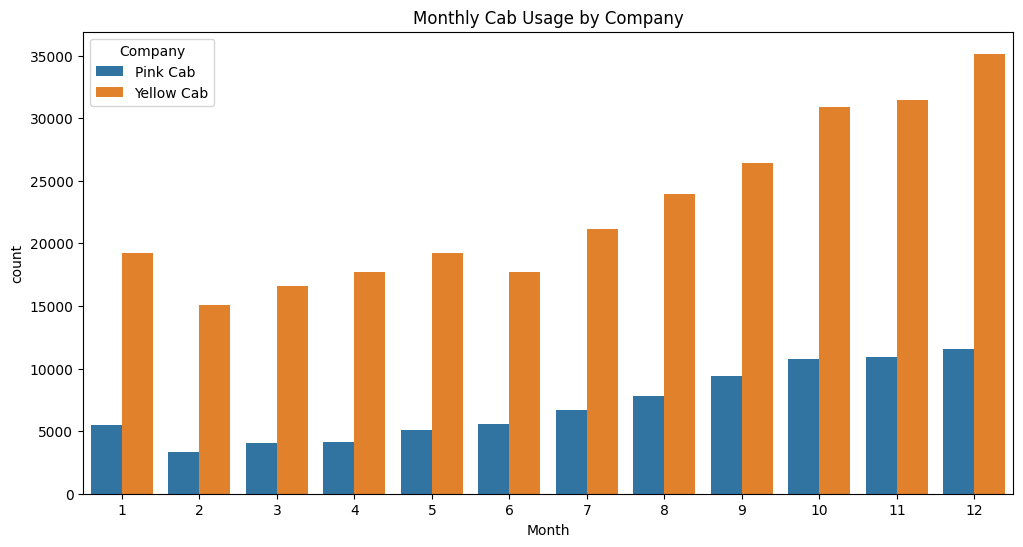

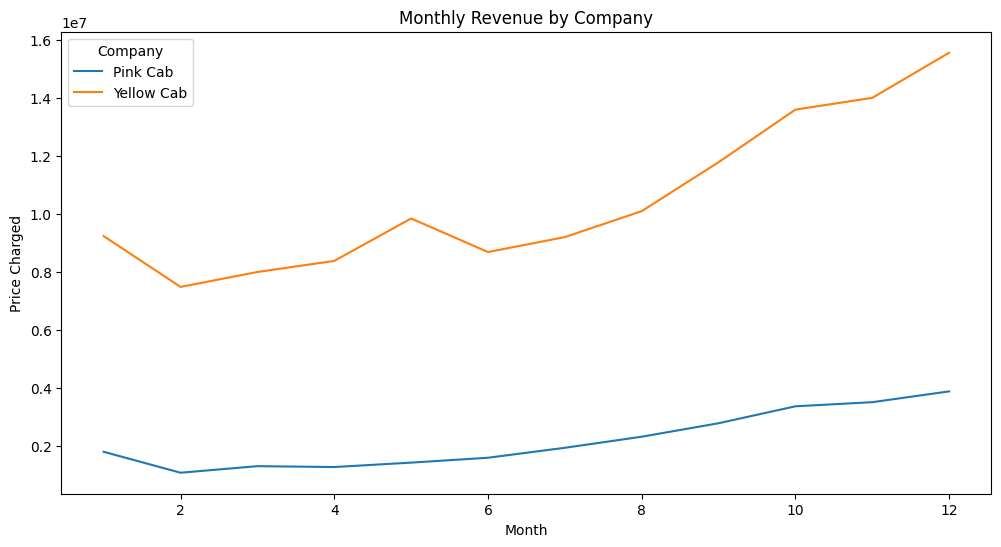

In [21]:
# Seasonality in Cab Usage
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])
master_data['Month'] = master_data['Date of Travel'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=master_data, x='Month', hue='Company')
plt.title('Monthly Cab Usage by Company')
plt.show()

# Company Performance Over Time
monthly_revenue = master_data.groupby(['Month', 'Company'])['Price Charged'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Price Charged', hue='Company')
plt.title('Monthly Revenue by Company')
plt.show()


<ipython-input-22-f2748ad6f3d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="rocket_r")
<ipython-input-22-f2748ad6f3d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x="Company", y='Profit',palette="rocket")


[Text(0, 0, '5.30733e+06')]

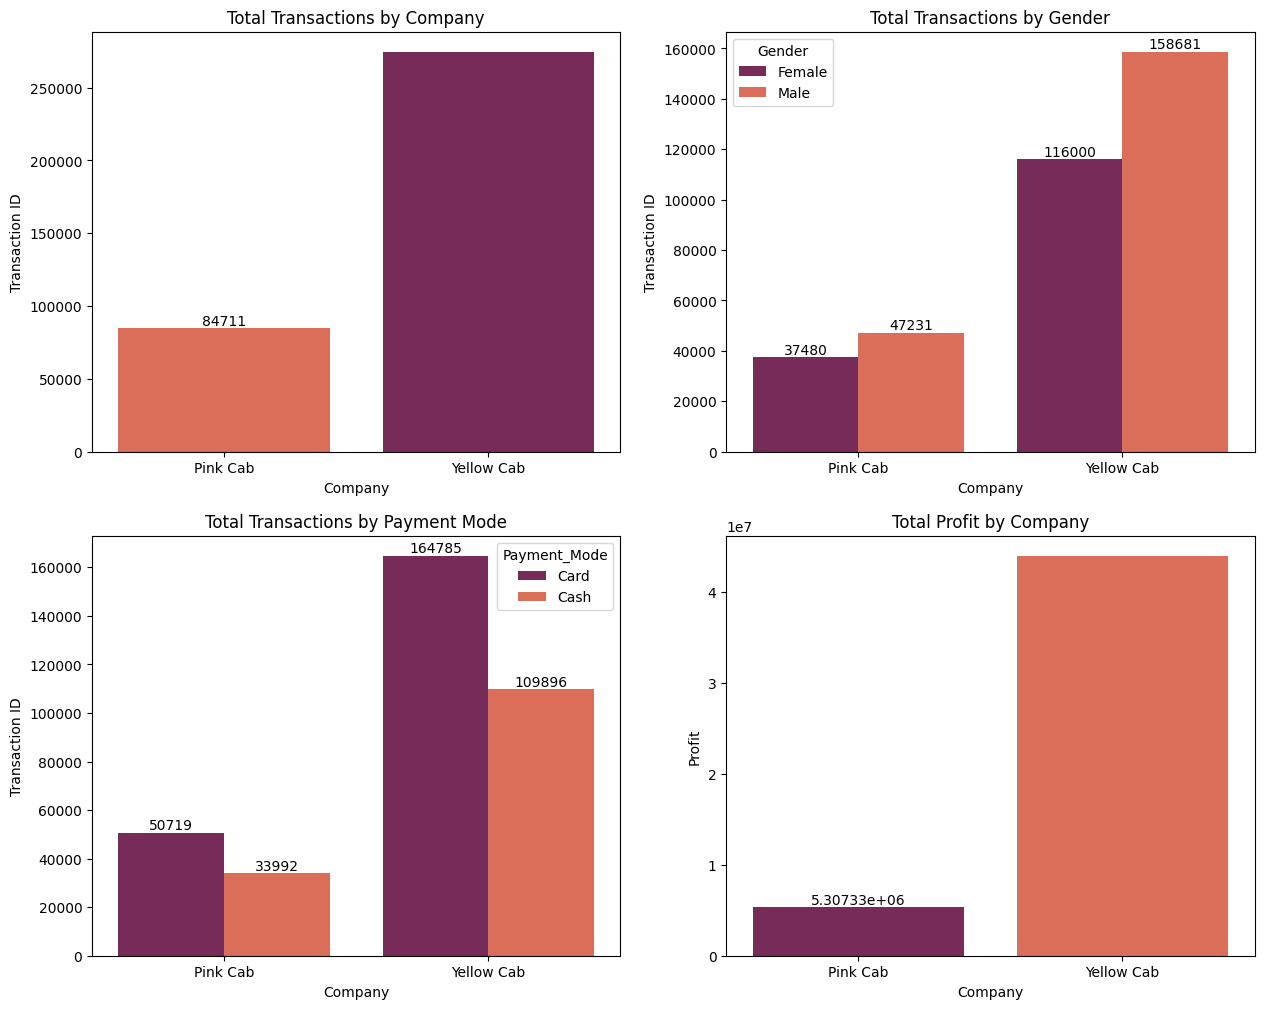

In [22]:

fig = plt.figure(figsize=(15,12))

fig.add_subplot(2,2,1)
group = master_data.groupby('Company')['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="rocket_r")
plt.title("Total Transactions by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

fig.add_subplot(2,2,2)
group = master_data.groupby(by=['Company','Gender'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Gender", y='Transaction ID',palette="rocket")
plt.title("Total Transactions by Gender")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.add_subplot(2,2,3)
group = master_data.groupby(by=['Company','Payment_Mode'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Payment_Mode", y='Transaction ID',palette="rocket")
plt.title("Total Transactions by Payment Mode")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

fig.add_subplot(2,2,4)
group = master_data.groupby(by=['Company'])['Profit'].sum().reset_index()
ax = sns.barplot(data =group, x="Company", y='Profit',palette="rocket")
plt.title("Total Profit by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])



<ipython-input-23-5b5d612fdbc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=population, x='Population',y='City', palette="rocket")


Text(0.5, 1.0, 'Total Population by City')

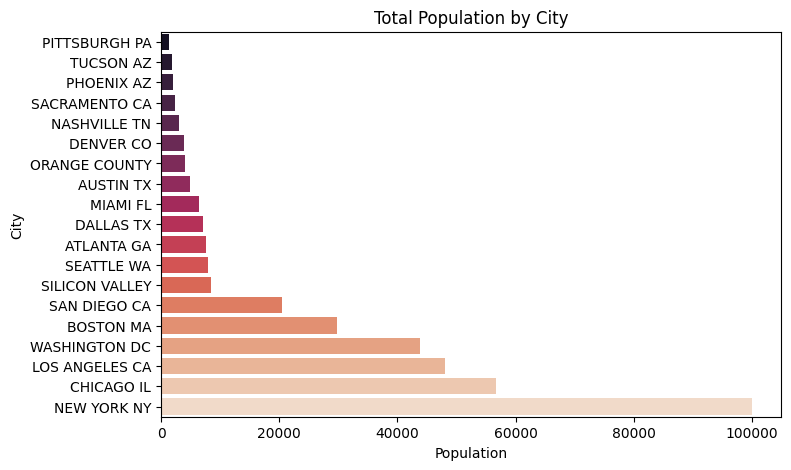

In [23]:
plt.figure(figsize=(8,5))
population=master_data.groupby("City").agg({"Population":"count"}).sort_values('Population').reset_index()
ax=sns.barplot(data=population, x='Population',y='City', palette="rocket")
plt.title('Total Population by City')

Text(0.5, 1.0, 'KM Travelled by Company')

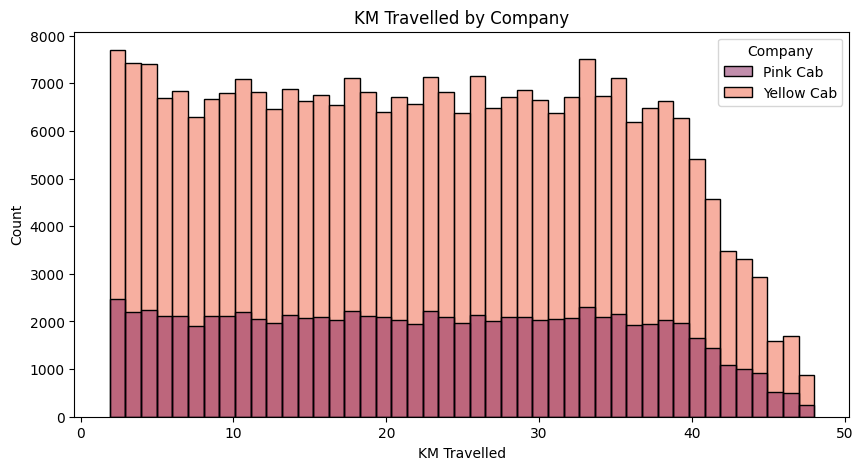

In [24]:
plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company'])['KM Travelled'].count().sort_values(ascending=False).reset_index()
ax = sns.histplot(data =master_data, x="KM Travelled", hue="Company",bins=45,palette="rocket")
plt.title("KM Travelled by Company")

Text(0.5, 1.0, 'Profit in Cities by Company')

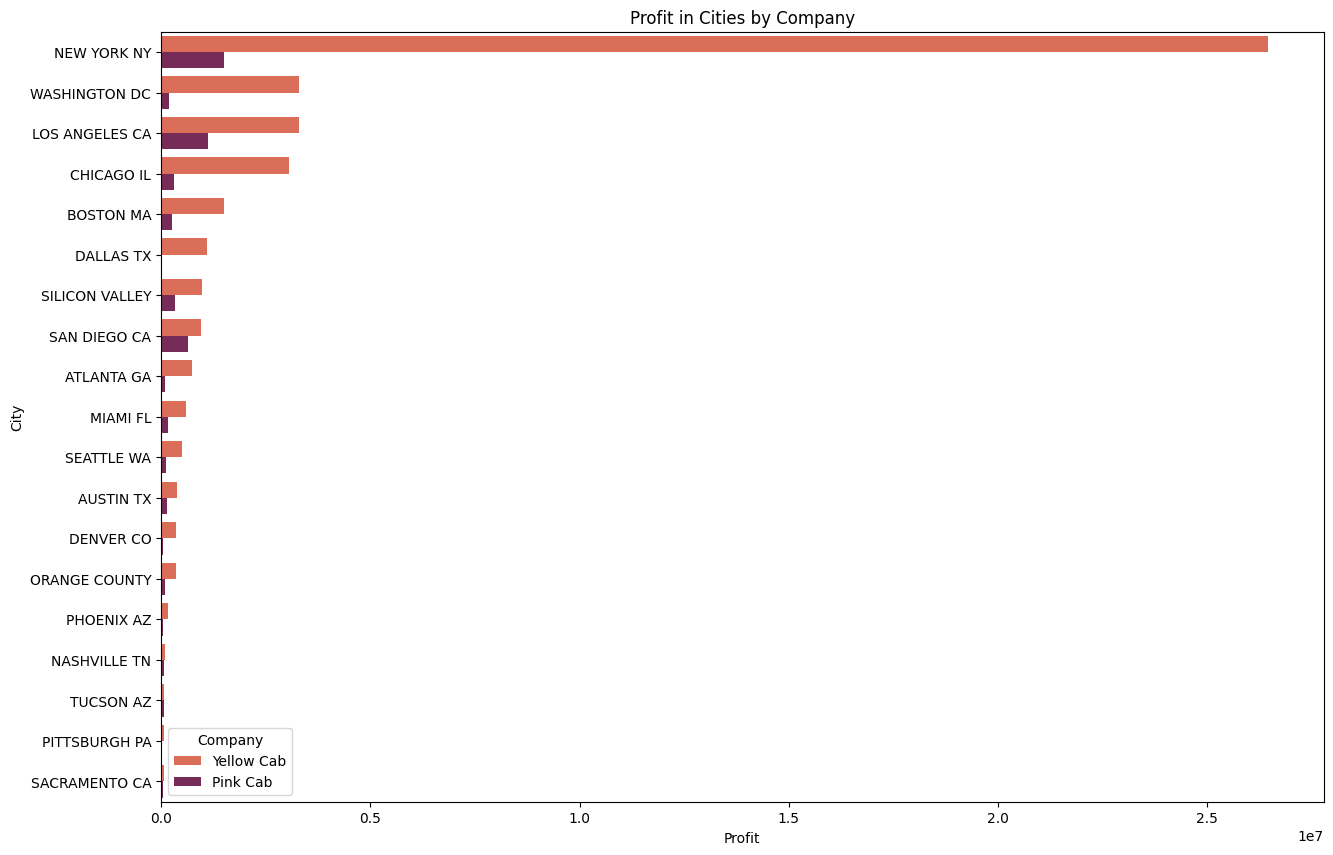

In [25]:
plt.figure(figsize=(15,10))
group = master_data.groupby(['Company','City'])['Profit'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x='Profit', y="City", hue="Company",palette="rocket_r")
plt.title("Profit in Cities by Company")

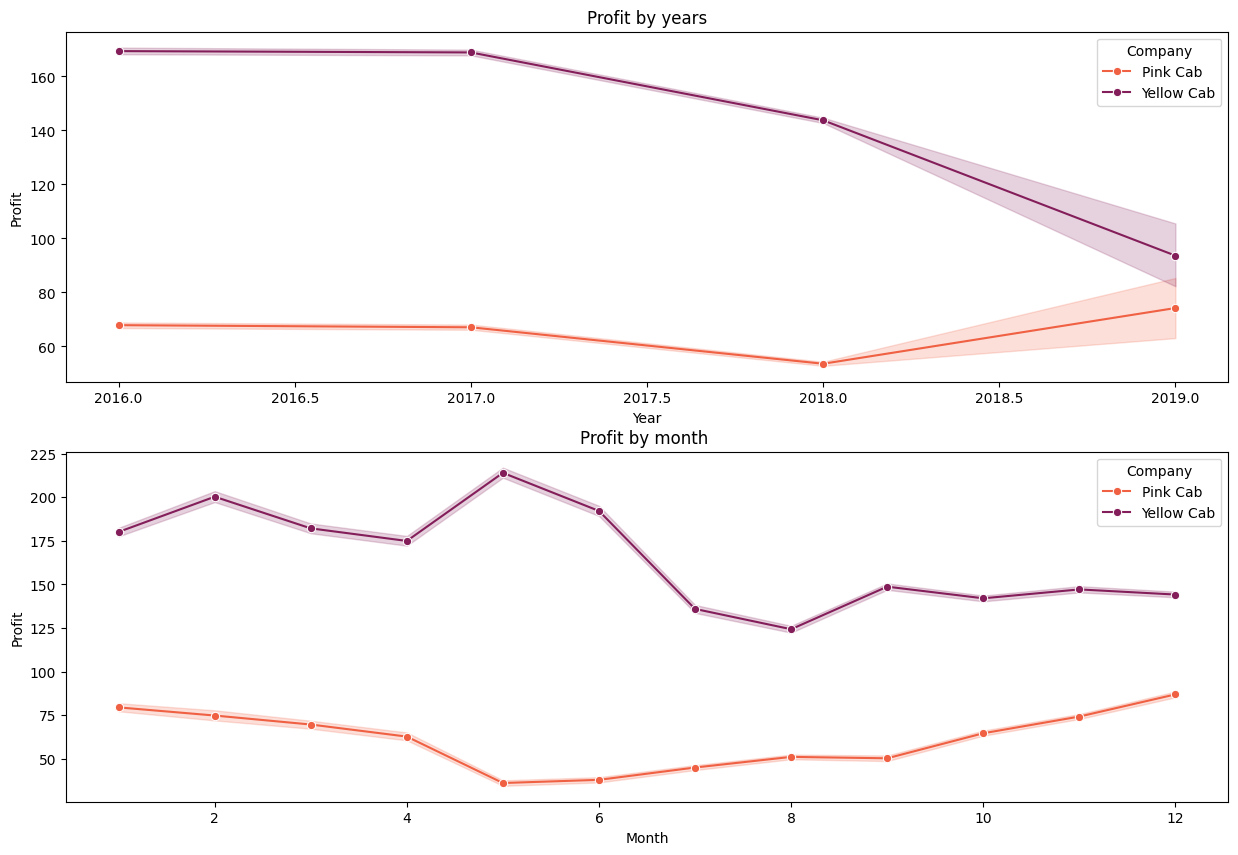

In [26]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1)
master_data["Year"] = master_data["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=master_data, x='Year', y='Profit', hue="Company", marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

fig.add_subplot(2,1,2)
master_data["Month"] = master_data["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=master_data, x='Month', y='Profit', hue="Company", marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

In [27]:
#avg profit per km
profit=master_data.groupby(['Company','Year'])['Profit'].sum().reset_index()
km=master_data.groupby(['Company','Year'])['KM Travelled'].sum().reset_index()
data1=profit['Profit']/km['KM Travelled']
data1=pd.DataFrame(data1)
data1.rename(columns={data1.columns[0]:'Profit'},inplace=True)
data1.loc[:, "Year"] = profit['Year']
data1.loc[:, "Company"] = profit['Company']
group=data1.groupby(['Company','Year'])['Profit'].sum().reset_index()
group

,Company,Year,Profit
0,Pink Cab,2016,3.024160
1,Pink Cab,2017,2.965563
2,Pink Cab,2018,2.374093
3,Pink Cab,2019,3.200222
4,Yellow Cab,2016,7.489302
5,Yellow Cab,2017,7.484665
6,Yellow Cab,2018,6.379079
7,Yellow Cab,2019,4.150689


<ipython-input-28-fd6486135e62>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="Year", y="Profit", data=company, estimator=sum, ci=None,  color='indigo')


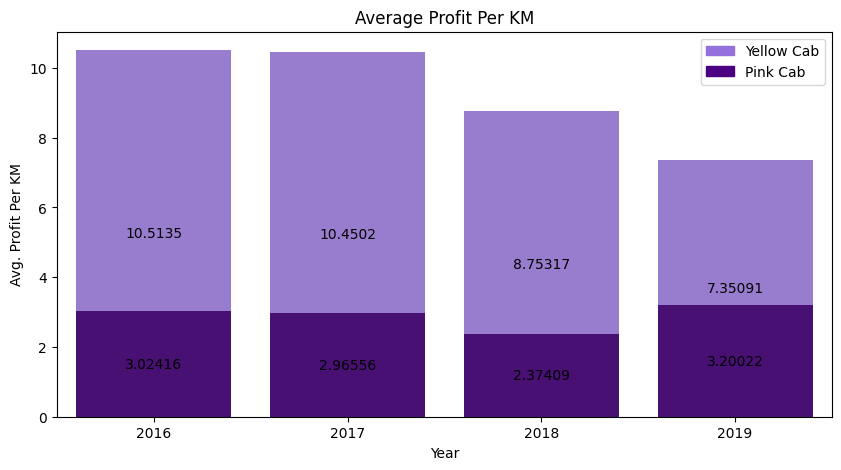

In [28]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company'])['KM Travelled'].count().sort_values(ascending=False).reset_index()
group=data1.groupby(['Year'])['Profit'].sum().reset_index()
#data = all_data.groupby('KM Travelled').agg(agg_dict).reset_index()

bar1 = sns.barplot(x="Year",  y="Profit", data=group, color='mediumpurple')
#group.plot(kind='barh', x="Year", legend=True)

# take only company=Pink Cab values from the data
company = data1[data1.Company=='Pink Cab']

#bottom bars (group of 'company=Pink Cab')
bar2 = sns.barplot(x="Year", y="Profit", data=company, estimator=sum, ci=None,  color='indigo')

#add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Pink Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar1.bar_label(bar1.containers[0],label_type='center')
bar2.bar_label(bar2.containers[1],label_type='center')

plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

# show the graph
plt.show()

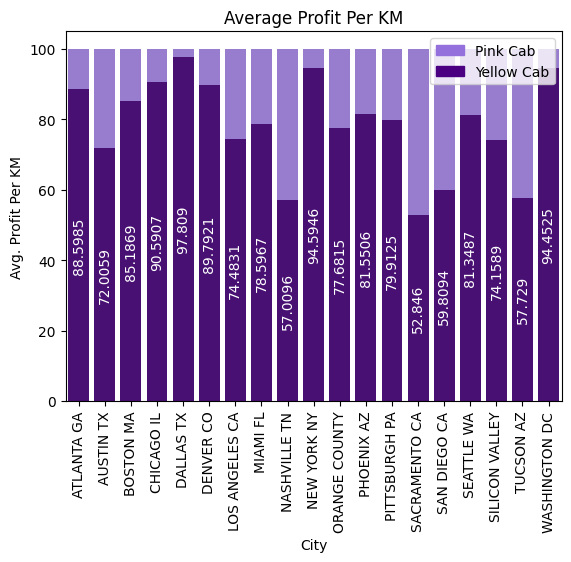

In [29]:
fig, ax = plt.subplots()


total = master_data.groupby('City')['Profit'].sum().reset_index()
company = master_data[master_data.Company=='Yellow Cab'].groupby('City')['Profit'].sum().reset_index()
company['Profit'] = [i / j * 100 for i,j in zip(company['Profit'], total['Profit'])]
total['Profit'] = [i / j * 100 for i,j in zip(total['Profit'], total['Profit'])]

# top bars (group of 'Company')
bar1 = sns.barplot(x="City",  y='Profit', data=total, color='mediumpurple')

#  bottom bars (group of 'Company=Yellow Cab')
bar2 = sns.barplot(x="City", y="Profit", data=company, color='indigo')

# add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Pink Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar2.bar_label(bar2.containers[1],label_type='center',rotation=90, color='white')


plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

plt.xticks(rotation=90)
# show the graph
plt.show()

<ipython-input-30-769cc616d237>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Population", data=master_data, palette="rocket_r")
<ipython-input-30-769cc616d237>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Users", data=master_data, palette="rocket_r")


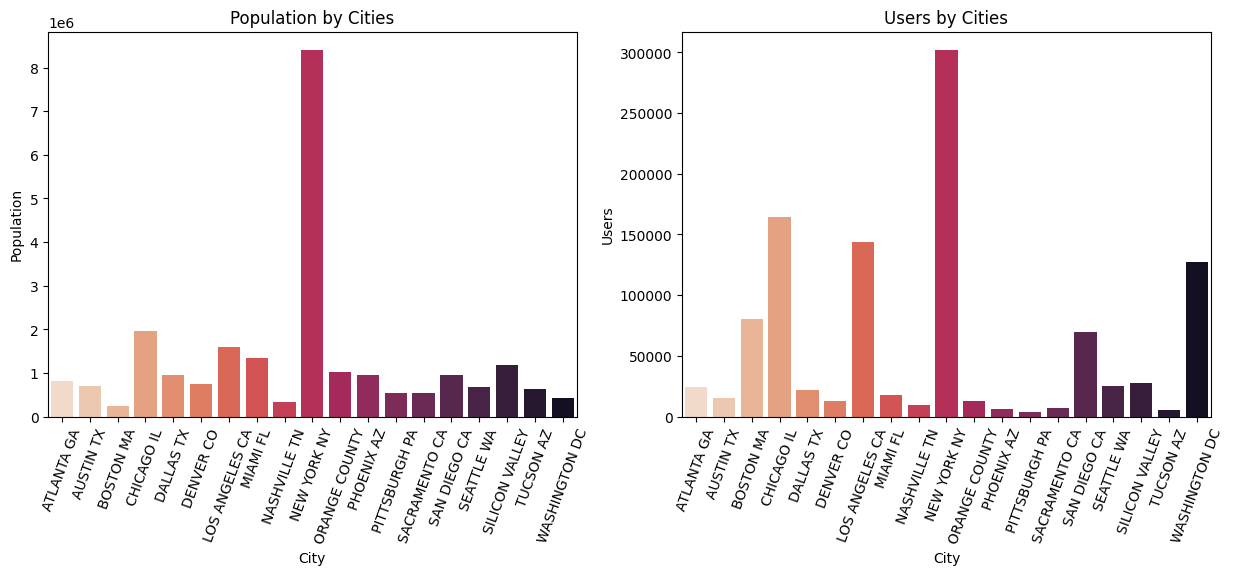

In [30]:
#Population and Users Comparison by Cities
fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
sns.barplot(x="City", y="Population", data=master_data, palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Population by Cities")

fig.add_subplot(1,2,2)
sns.barplot(x="City", y="Users", data=master_data, palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Users by Cities")

plt.show()

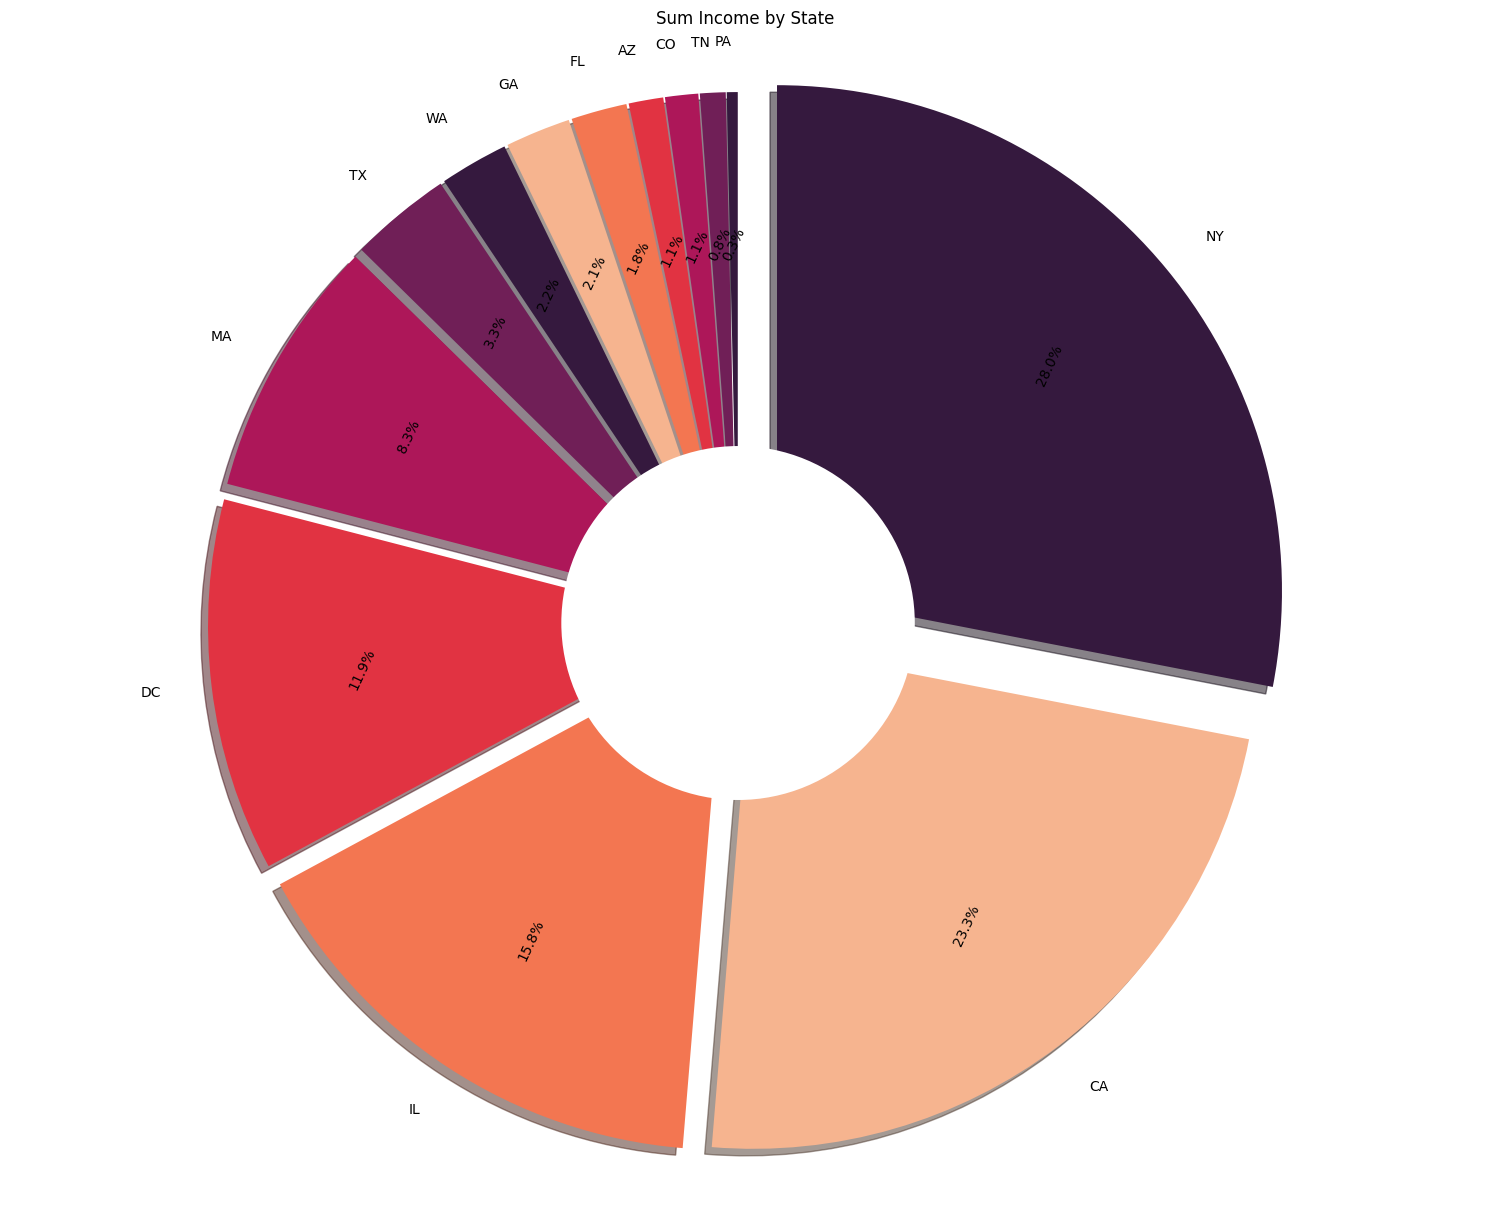

In [31]:
state_income=master_data.groupby("State").agg({"Income (USD/Month)":"sum"}).sort_values('Income (USD/Month)').reset_index()
state_income.columns=['State','Income (USD/Month)']

fig, ax = plt.subplots(figsize=(15,12))

textprops = {"fontsize":10}
explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
#explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

pie_properties=ax.pie(data=state_income, x='Income (USD/Month)', labels= 'State' , pctdistance=0.7,
               autopct='%1.1f%%',
               colors=sns.color_palette("rocket"),radius = 2,
               explode = explodes, shadow=True, startangle=90 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

fraction_text_list = pie_properties[2]
for text in fraction_text_list:
    text.set_rotation(65)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Sum Income by State")

plt.show()

Hypothesis: Impact of Gender on Trip Distance
Hypothesis: Male and female customers travel different average distances.
Approach:

Group data by gender and calculate average trip distances.
Perform a t-test to check for significant differences.
Visualize the comparison using box plots or bar charts.

Average Trip Distances by Gender:
   Gender  KM Travelled
0  Female     22.586388
1    Male     22.552992

T-test results:
T-statistic: -0.8094676217804752
P-value: 0.41824680225749566


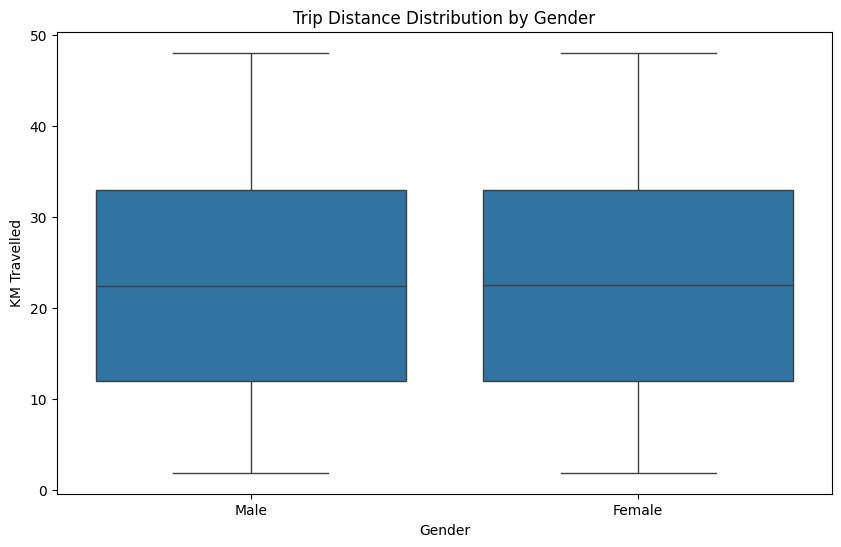

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Merge datasets (assuming already loaded and merged)
# Example: master_data = cab_data.merge(transaction_data, on='Transaction ID').merge(customer_data, on='Customer ID')

# Group data by gender and calculate average trip distances
average_trip_distances = master_data.groupby('Gender')['KM Travelled'].mean().reset_index()

# Print average trip distances by gender
print("Average Trip Distances by Gender:")
print(average_trip_distances)

# Perform t-test to compare average trip distances between genders
male_distances = master_data[master_data['Gender'] == 'Male']['KM Travelled']
female_distances = master_data[master_data['Gender'] == 'Female']['KM Travelled']
t_statistic, p_value = stats.ttest_ind(male_distances, female_distances, equal_var=False)

print("\nT-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Visualization: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='KM Travelled', data=master_data)
plt.title('Trip Distance Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('KM Travelled')
plt.show()


##Hypothesis2 : There is correlation between population and cab users per capita in a city

0     0.035945
1     0.084121
2     0.090363
3     0.013199
4     0.023138
5     0.012613
6     0.072964
7     0.006497
8     0.023499
9     0.030312
10    0.016468
11    0.021447
12    0.037338
13    0.009046
14    0.339282
15    0.012906
16    0.006720
17    0.303207
18    0.028329
19    0.321411
Name: Cab Users per Capita, dtype: float64


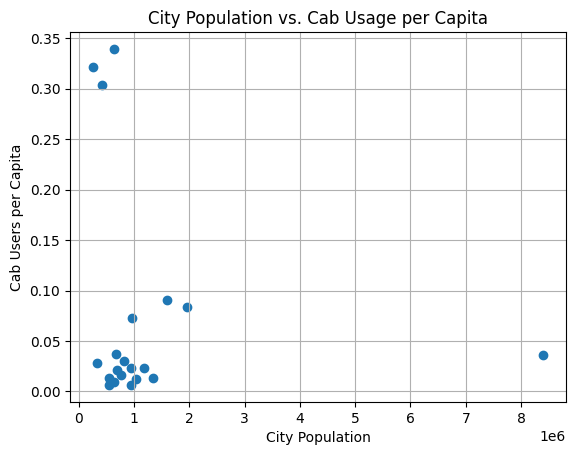

Correlation between Population and Cab Users per Capita: -0.15031212128935015
The correlation is not positive, so the hypothesis is not strongly supported by this data.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt



city_data['Cab Users per Capita'] = city_data['Users'] / city_data['Population']

print(city_data['Cab Users per Capita'])


# Correlation analysis
correlation = city_data['Population'].corr(city_data['Cab Users per Capita'])

# Visualization
plt.scatter(city_data['Population'], city_data['Cab Users per Capita'])
plt.xlabel('City Population')
plt.ylabel('Cab Users per Capita')
plt.title('City Population vs. Cab Usage per Capita')
plt.grid(True)
plt.show()

# Print correlation coefficient
print("Correlation between Population and Cab Users per Capita:", correlation)

# Interpretation (replace with your analysis based on results)
if correlation > 0:
  print("There is a positive correlation between city population and cab usage per capita, which partially supports the hypothesis.")
else:
  print("The correlation is not positive, so the hypothesis is not strongly supported by this data.")





##Hypothesis 3:

###H0:The variable Year has not a positive correlation with mileage
###H1:The variable Year has a positive correlation with mileage

In [35]:
from scipy.stats import ttest_ind
agg_dict = {
    'KM Travelled': 'mean'
      }
group1 = master_data.groupby((master_data.Year==2018)&(master_data.Company=='Pink Cab')).agg(agg_dict)
group2 = master_data.groupby((master_data.Year==2017)&(master_data.Company=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

group1 = master_data.groupby((master_data.Year==2018)&(master_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = master_data.groupby((master_data.Year==2017)&(master_data.Company=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Rejecting Null Hypothesis H0")
elif p_value>=0.05:
  print("Rejecting Alternative Hypothesis H1")

t_statistics: [-0.66243408] 
p_value: [0.57581736]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.42772975] 
p_value: [0.71050085]
Rejecting Alternative Hypothesis H1


##Hypothesis 4: Is there any difference in profit regarding Gender
###H0 : There is no difference regarding Gender in both cab companies.
###H1 : There is difference regarding Gender in both cab companies.



In [36]:
a = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [41]:
a = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


##Hypothesis 5: Is there any difference in Profit regarding Payment mode
###H0 : There is no difference regarding Payment_Mode in both cab companies.
###H1 : There is difference regarding Payment_Mode in both cab companies..

In [39]:
a = master_data[(master_data['Payment_Mode']=='Cash')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data['Payment_Mode']=='Card')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793286
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [42]:
a = master_data[(master_data['Payment_Mode']=='Cash')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data['Payment_Mode']=='Card')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab
